## 3.2. Linear Regression Implementation from Scratch

In [22]:
%matplotlib inline
import matplotlib
import random
import jax
import jax.numpy as jnp
from jax import random
import numpy as np

### 3.2.1. Generating the Dataset

(1000, 2)
(1000, 1)
features: [-1.196918   -0.16342507] 
label: [-1.8361968]


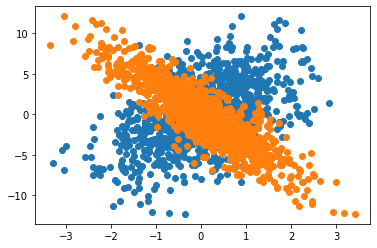

In [23]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    key = jax.random.PRNGKey(1071)
    X = jax.random.normal(key, shape=(num_examples, len(w)))
    y = jax.numpy.matmul(X, w) + np.random.normal(0, 0.01, size=(num_examples, 1))
    return X, y
true_w = jnp.array([[2, -3.4]])
true_b = 4.2
num_examples = 1000
features, labels = synthetic_data(jnp.transpose(true_w), true_b, num_examples)
print(jnp.shape(X))
print(jnp.shape(y))
print('features:', features[0],'\nlabel:', labels[0])

matplotlib.pyplot.scatter(features[:, 0], labels)
matplotlib.pyplot.scatter(features[:, 1], labels)